In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams['figure.dpi'] = 200
import Preprocessing
import Settings
import Sampling
import VideoAnalysis

In [2]:
dataFile = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)[0]

propertyFile = Preprocessing.loadRunData(dataFile)
video = Preprocessing.loadVideo(dataFile)
matFile = Preprocessing.loadMatFile(dataFile)

In [9]:
Sampling.playVideo(video, propertyFile)

345.0

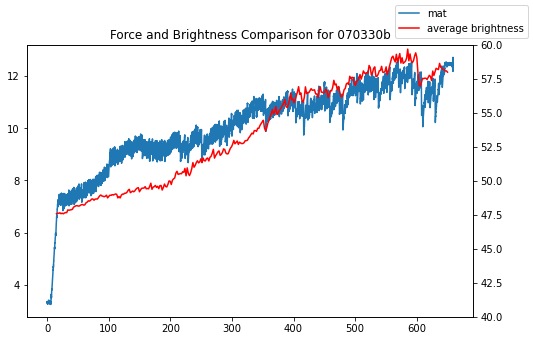

In [3]:
matForce = matFile["f"]
matTime = matFile["t"]

videoTime = VideoAnalysis.timeArr(video, propertyFile)
videoForce = VideoAnalysis.averageBrightness(video, propertyFile)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(matTime, matForce, label='mat')

ax1 = ax.twinx()

ax1.plot(videoTime, videoForce, label='average brightness', color='r')
#ax.legend()
fig.legend()
ax1.set_ylim([40, 60])

plt.title(f'Force and Brightness Comparison for {dataFile}')
plt.savefig('VideoSync_images/BrightnessAndForce.pdf')
plt.show()

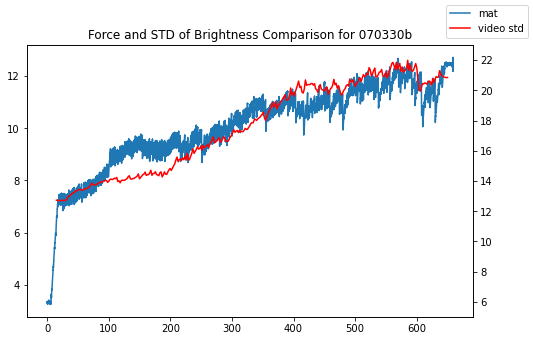

In [4]:
matForce = matFile["f"]
matTime = matFile["t"]

videoTime = VideoAnalysis.timeArr(video, propertyFile)
videoSTD = VideoAnalysis.standardDeviation(video, propertyFile)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(matTime, matForce, label='mat')

ax1 = ax.twinx()

ax1.plot(videoTime, videoSTD, label='video std', color='r')
#ax.legend()
fig.legend()
ax1.set_ylim([5, 23])
plt.title(f'Force and STD of Brightness Comparison for {dataFile}')
plt.savefig('VideoSync_images/STDAndForce.pdf')
plt.show()

200 200


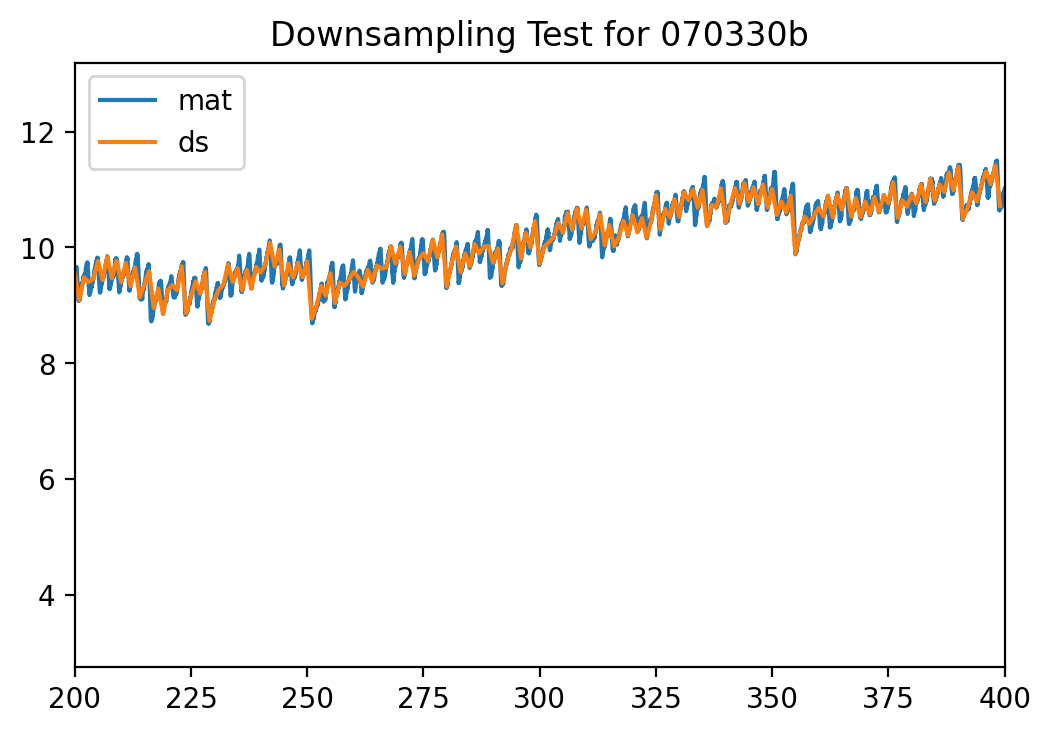

In [7]:
matForce = matFile["f"]
matTime = matFile["t"]

startIndex = 20000
endIndex = 40000

dsTime = Sampling.sliceDownsample(matTime[startIndex:endIndex], 100)
dsForce = Sampling.sliceDownsample(matForce[startIndex:endIndex], 100)

#dsTime = Sampling.boxcarDownsample(matTime[startIndex:endIndex], 100)
#dsForce = Sampling.boxcarDownsample(matForce[startIndex:endIndex], 100)

print(len(dsTime), len(dsForce))

plt.plot(matTime, matForce, label='mat')
plt.plot(dsTime, dsForce, label='ds')
plt.plot()

plt.xlim([200, 400])

plt.legend()
plt.title(f'Downsampling Test for {dataFile}')
#plt.savefig('VideoSync_images/downsample1.png')
plt.show()